# TP3 - Détection de Contours
Ce notebook implémente les opérateurs Sobel, Prewitt et Canny pour détecter les bords d'une image.

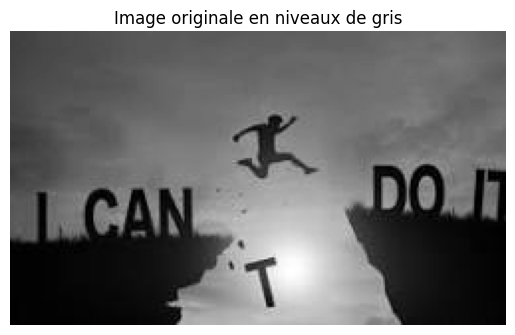

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
image = cv2.imread('../Segmentation/image.jpg', cv2.IMREAD_GRAYSCALE)

# Afficher l'image originale
plt.imshow(image, cmap='gray')
plt.title("Image originale en niveaux de gris")
plt.axis('off')
plt.show()


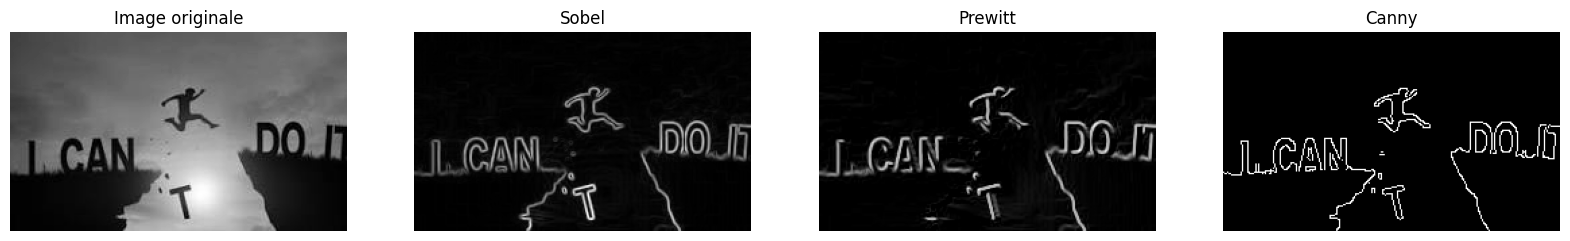

In [3]:

# Appliquer l'opérateur Sobel
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# Appliquer l'opérateur Prewitt
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewittx = cv2.filter2D(image, -1, kernelx)
prewitty = cv2.filter2D(image, -1, kernely)
prewitt = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

# Appliquer l'opérateur Canny
canny = cv2.Canny(image, 100, 200)

# Affichage des résultats
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title("Image originale")
axs[0].axis('off')

axs[1].imshow(sobel, cmap='gray')
axs[1].set_title("Sobel")
axs[1].axis('off')

axs[2].imshow(prewitt, cmap='gray')
axs[2].set_title("Prewitt")
axs[2].axis('off')

axs[3].imshow(canny, cmap='gray')
axs[3].set_title("Canny")
axs[3].axis('off')

plt.show()


In [4]:

from ipywidgets import interact

def apply_canny(threshold1, threshold2):
    edges = cv2.Canny(image, threshold1, threshold2)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Canny (Seuils: {threshold1}, {threshold2})")
    plt.axis('off')
    plt.show()

interact(apply_canny, threshold1=(0, 255, 5), threshold2=(0, 255, 5))


interactive(children=(IntSlider(value=125, description='threshold1', max=255, step=5), IntSlider(value=125, de…

<function __main__.apply_canny(threshold1, threshold2)>

In [5]:

# Sauvegarde des images détectées
cv2.imwrite('sobel.jpg', sobel)
cv2.imwrite('prewitt.jpg', prewitt)
cv2.imwrite('canny.jpg', canny)


True

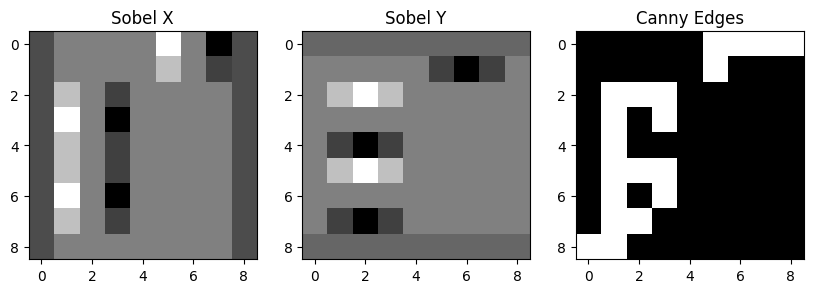

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Définir une image 9x9
image = np.array([
    [10, 20, 30, 40, 50, 60, 170, 80, 90],
    [15, 25, 35, 45, 55, 65, 75, 85, 95],
    [20, 30, 40, 50, 60, 70, 80, 90, 100],
    [25, 35, 145, 55, 65, 75, 85, 95, 105],
    [30, 40, 50, 60, 70, 80, 90, 100, 110],
    [35, 45, 55, 65, 75, 85, 95, 105, 115],
    [40, 50, 160, 70, 80, 90, 100, 110, 120],
    [45, 55, 65, 75, 85, 95, 105, 115, 125],
    [50, 60, 70, 80, 90, 100, 110, 120, 130]
], dtype=np.uint8)

# Appliquer le filtre Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Bords verticaux
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Bords horizontaux
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Norme du gradient

# Appliquer le filtre de Canny
canny_edges = cv2.Canny(image, 50, 150)

# Afficher les résultats
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(sobel_x, cmap='gray'), plt.title("Sobel X")
plt.subplot(1,3,2), plt.imshow(sobel_y, cmap='gray'), plt.title("Sobel Y")
plt.subplot(1,3,3), plt.imshow(canny_edges, cmap='gray'), plt.title("Canny Edges")
plt.show()
